In [1]:
import numpy as np
import cv2 as cv
from os.path import isfile, join
from os import listdir
import eval 
import tqdm
import matplotlib.pyplot as plt 

def getImage(path):
  return cv.imread(path)

def violaJones(img,minOverlaps,facesOnly = False):
  face_cascade = cv.CascadeClassifier('haarcascade_frontalface_default.xml')
  gray = cv.cvtColor(img, cv.COLOR_BGR2GRAY)

  faces = face_cascade.detectMultiScale(gray, 1.05, int(minOverlaps))
  for (x,y,w,h) in faces:
      cv.rectangle(img,(x,y),(x+w,y+h),(255,0,0),2)
  if facesOnly:
    return faces
  return img,faces

def getTestIm(imName,img, facesOnly = False):
  annotationsPath = '../LabHOG/data/test_scenes/ground_truth_bboxes.txt'
  with open(annotationsPath, "r") as f:
    lines = f.readlines()
  faces = list(filter(lambda x: imName == x.split(' ')[0], lines))
  for face in faces:
    x,y,w,h = [int(x) for x in face.split(' ')[1:]]
    cv.rectangle(img,(x,y),(w,h),(0,255,0),2)
  if facesOnly:
    return faces
  return img,faces

def evaluate(faceAnnotations,facePredictions):
  alreadyPredicted = np.zeros(len(faceAnnotations))

  for anot in faceAnnotations:
    maxPred = getMaxPred(anot,facePredictions)

    



def showImage(img):
  cv.imshow('img',img)
  cv.waitKey(0)
  cv.destroyAllWindows()


testImPath = '../LabHOG/data/test_scenes/test_jpg/'
testImages = [f for f in listdir(testImPath) if isfile(join(testImPath, f))]

thresholds = np.linspace(1,11,10)
TP = np.zeros(len(thresholds)) 
FP = np.zeros(len(thresholds)) 
FN = np.zeros(len(thresholds))  

# print(testImages[0])
for i,im in tqdm.tqdm(enumerate(testImages),total=len(testImages)):

  img,annotFaces = getTestIm(im,getImage(testImPath + im))
  # showImage(img)
  for t,thresh in enumerate(thresholds):
    img,predFaces = violaJones(img,thresh)
    TPi,FPi,FNi = eval.evalImage(annotFaces,predFaces,0.3)
    TP[t]+=TPi
    FP[t]+=FPi
    FN[t]+=FNi
  # break
print(TP,FP,FN)
p = []
r = []
for t,thresh in enumerate(thresholds):
  precision, recall = eval.PR(TP[t],FP[t],FN[t])
  p.append(precision)
  r.append(recall)
  # break
print(p)
print(r)

100%|██████████| 130/130 [04:37<00:00,  2.39s/it]

[279. 250. 237. 235. 224. 217. 209. 191. 189. 174.] [601. 404. 310. 267. 246. 226. 214. 216. 209. 186.] [232. 261. 274. 276. 287. 294. 302. 320. 322. 337.]
[0.3170454545454545, 0.382262996941896, 0.43327239488117003, 0.4681274900398406, 0.4765957446808511, 0.4898419864559819, 0.4940898345153664, 0.4692874692874693, 0.4748743718592965, 0.48333333333333334]
[0.5459882583170255, 0.4892367906066536, 0.4637964774951076, 0.4598825831702544, 0.4383561643835616, 0.4246575342465753, 0.4090019569471624, 0.37377690802348335, 0.3698630136986301, 0.3405088062622309]


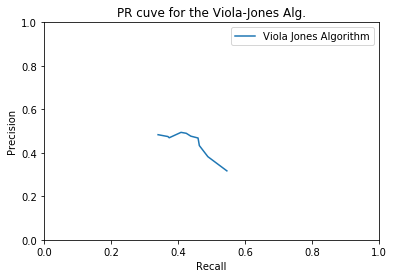

In [4]:
plt.plot(r,p,label='Viola Jones Algorithm')

plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('PR cuve for the Viola-Jones Alg.')
# plt.show()
plt.xlim((0,1))
plt.ylim((0,1))
plt.legend()
plt.savefig('violaJonesPR.png')